In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from task_3_core.som import SOM
from task_3_core.node import Node 

from sklearn.model_selection import train_test_split

from setup import get_task_data

EPOCHS = 100

In [2]:
df = pd.read_csv(get_task_data('Iris.csv'))
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
118,119,7.7,2.6,6.9,2.3,Iris-virginica
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
95,96,5.7,3.0,4.2,1.2,Iris-versicolor


In [3]:
species = df['Species']

df = df.drop(['Species', 'Id'], axis=1)
df = (df - df.min()) / (df.max() - df.min())
df['Species'] = species

df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
26,0.194444,0.583333,0.101695,0.125000,Iris-setosa
106,0.166667,0.208333,0.593220,0.666667,Iris-virginica
56,0.555556,0.541667,0.627119,0.625000,Iris-versicolor
13,0.000000,0.416667,0.016949,0.000000,Iris-setosa
49,0.194444,0.541667,0.067797,0.041667,Iris-setosa


In [4]:
def plot_map(som, data):
    fig, ax = plt.subplots(figsize=(5, 5))

    class_styles = {
        'Iris-setosa' : 's',
        'Iris-versicolor': '*',
        'Iris-virginica': 'v',
    }

    for species in class_styles.keys():
        points_xs = data[data['Species'] == species]['SepalLengthCm'].to_numpy()
        points_ys = data[data['Species'] == species]['PetalLengthCm'].to_numpy()

        ax.scatter(points_xs, points_ys, marker=class_styles[species])


    nodes = list(map(lambda n: list(n.position), som.nodes))
    nodes_xs = [x for [x, y] in nodes]
    nodes_ys = [y for [x, y] in nodes]

    ax.scatter(nodes_xs, nodes_ys, color='black', s=3)

    for node in som.nodes:
        start_pos = list(node.position)
        for neighbor in node.neighbors:
            end_pos = list(neighbor.position)
            plt.plot(*np.transpose([start_pos, end_pos]), color='black')

    plt.show()

Kohonen map can be used as a clusterizer or as a non-linear analogue of PCA. 

It will be shown as a clusterizer on a subset of 2D data with visual representation and as a mapping on full 4D data of iris dataset and then analyzed in terms of mapping quality.  

In [5]:
subset_2d = df[['SepalLengthCm', 'PetalLengthCm', 'Species']]

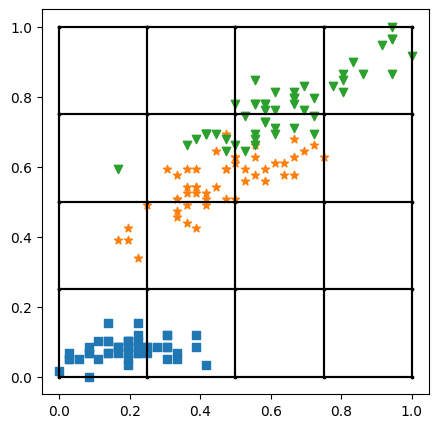

In [6]:
kohonen_map_2d = SOM((5, 5), 2, a0=0.025, s0=0.1)
plot_map(kohonen_map_2d, subset_2d)

In [7]:
input_data = subset_2d.drop('Species', axis=1)
input_data.sample(5)

,SepalLengthCm,PetalLengthCm
93,0.194444,0.389831
147,0.611111,0.711864
51,0.583333,0.593220
46,0.222222,0.101695
103,0.555556,0.779661


In [8]:
kohonen_map_2d.train(input_data.to_numpy(), len(input_data) * EPOCHS)

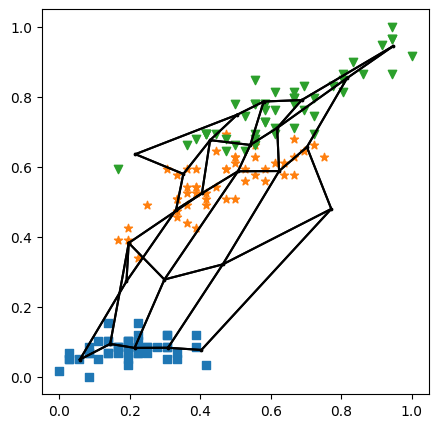

In [9]:
plot_map(kohonen_map_2d, subset_2d)

In [10]:
kohonen_map_2d.score()

Quantization error: 0.0021870322462247903
Topographic error: 0.20886666666666667


Tuning for best shape:

In [11]:
for x in range(2, 11):
    kohonen_map = SOM((x, x), 2, a0=0.025, s0=0.5 / x)
    kohonen_map.train(input_data.to_numpy(), len(input_data) * EPOCHS)
    
    print(f'{x}:')
    kohonen_map.score()
    print('\n\n')

2:
Quantization error: 0.01937439240570249
Topographic error: 6.666666666666667e-05



3:
Quantization error: 0.008061300960534076
Topographic error: 0.015266666666666666



4:
Quantization error: 0.0033196618105204283
Topographic error: 0.24286666666666668



5:
Quantization error: 0.002154984422421604
Topographic error: 0.21173333333333333



6:
Quantization error: 0.0016778622916466892
Topographic error: 0.3518



7:
Quantization error: 0.0013509941536301263
Topographic error: 0.3238



8:
Quantization error: 0.001176215388195421
Topographic error: 0.2176



9:
Quantization error: 0.0009700902087310982
Topographic error: 0.19266666666666668



10:
Quantization error: 0.000796771735130861
Topographic error: 0.24473333333333333





Mapping 4D:

In [12]:
kohonen_map_4d = SOM((5, 5), 4, a0=0.025, s0=0.1)

In [13]:
input_data = df.drop('Species', axis=1)
input_data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
3,0.083333,0.458333,0.084746,0.041667
62,0.472222,0.083333,0.508475,0.375000
47,0.083333,0.500000,0.067797,0.041667
4,0.194444,0.666667,0.067797,0.041667
9,0.166667,0.458333,0.084746,0.000000


In [14]:
kohonen_map_4d.train(input_data.to_numpy(), len(input_data) * EPOCHS)

In [15]:
kohonen_map_4d.score()

Quantization error: 0.015584217866146003
Topographic error: 0.1948


Tuning for best shape:

In [16]:
for x in range(2, 11):
    kohonen_map = SOM((x, x), 4, a0=0.025, s0=0.5 / x)
    kohonen_map.train(input_data.to_numpy(), len(input_data) * EPOCHS)
    
    print(f'{x}:')
    kohonen_map.score()
    print('\n\n')

2:
Quantization error: 0.05344258713528114
Topographic error: 0.0056



3:
Quantization error: 0.045556951324915225
Topographic error: 0.8768666666666667



4:
Quantization error: 0.024508756453430675
Topographic error: 0.3433333333333333



5:
Quantization error: 0.0165127797829521
Topographic error: 0.22406666666666666



6:
Quantization error: 0.014580164347088144
Topographic error: 0.18566666666666667



7:
Quantization error: 0.014282070786876693
Topographic error: 0.23733333333333334



8:
Quantization error: 0.012934126424242734
Topographic error: 0.14546666666666666



9:
Quantization error: 0.011459896915609008
Topographic error: 0.14273333333333332



10:
Quantization error: 0.010935664915142848
Topographic error: 0.12706666666666666



